In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font size="5" color="red">ch01</font></b>
# 1.기존의 프로그램 방식

In [2]:
#섭씨온도를 화씨온도를 출력
def celsius_to_faherenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도?'))
print('화씨온도는',celsius_to_faherenheit(input_c))

섭씨온도?0
화씨온도는 32.0


# 2. 머신러닝 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리: 
   스케일 조정
   훈련데이터(학습데이터셋), 검증데이터셋. 시험데이터셋로 분할
3. 모델 구성
4. 모델 학습과정 설정
5. 모델 학습시키기 
6. 모델 평가(시험데이터셋으로)
    <모델 저장>
7. 모델 사용(입력값이 주어지면 예측값 받기)
```

## 2.1 노이즈가 없는 데이터로 실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#1. 데이터생성
data_C = np.arange(100) #0부터 99까지
data_C #독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsius_to_faherenheit(data_C)
data_F #종속변수(타켓변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 2. 데이터 전처리: 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C/ 100.0
scaled_data_F = data_F/ 100.0
print('학습시 독립변수:', scaled_data_C)
print('학습시 타겟변수:', scaled_data_F)

학습시 독립변수: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 타겟변수: [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.7

In [8]:

# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')


2.10.0


[]

In [9]:
# 3. 모델구성
from tensorflow.keras.models import Sequential #모델생성
from tensorflow.keras.layers import Dense, Input #입력값과 출력값으로 Layers 층 지정

model = Sequential()
#model.add(Input(shape=(1,)))
#model.add(Dense(1))
model.add(Dense(units=1, #타켓(종속)변수의 갯수
                input_shape=(1,))) #입력 (독립) 변수의 shape

In [10]:
# 4.모델 학습과정 설정
model.compile(loss='mse', #손실함수 -모델학습 중 오차를 최소화하기 위해 사용
             optimizer='rmsprop', #옵티마이저
             metrics = ['mae']) #평가지표
# mse : 오차 제곱의 평균(이상치 반영)
# mae : 오차 절대값의 평균(이상치 영향이 감소)
# mae: 오차 절대값의 평균(이상치 영향이 감소)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
#학습 전 예측
model.predict(np.array([[0],[0.01]])) #섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 74ms/step


array([[ 0.        ],
       [-0.00400548]], dtype=float32)

In [12]:
#학습 전 모델 저장
model.save('model/before_learning.h5')

In [13]:
# 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C, #입려변수(훈련데이터)
                scaled_data_F, #타겟변수(훈련데이터)
                epochs=1000, #학습횟수
                verbose = 2) #학습시 출력여부(0:학습내용출력x)

Epoch 1/1000
4/4 - 0s - loss: 2.3735 - mae: 1.4044 - 342ms/epoch - 86ms/step
Epoch 2/1000
4/4 - 0s - loss: 2.3382 - mae: 1.3924 - 8ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 2.3148 - mae: 1.3847 - 8ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 2.2942 - mae: 1.3778 - 10ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 2.2734 - mae: 1.3709 - 8ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 2.2540 - mae: 1.3644 - 9ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 2.2373 - mae: 1.3587 - 8ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 2.2196 - mae: 1.3527 - 9ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 2.2012 - mae: 1.3465 - 9ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 2.1859 - mae: 1.3412 - 8ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 2.1688 - mae: 1.3353 - 8ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 2.1524 - mae: 1.3297 - 9ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 2.1340 - mae: 1.3233 - 7ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - loss:

4/4 - 0s - loss: 0.8383 - mae: 0.7686 - 7ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.8284 - mae: 0.7633 - 9ms/epoch - 2ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.8195 - mae: 0.7586 - 7ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.8102 - mae: 0.7537 - 7ms/epoch - 2ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.8004 - mae: 0.7487 - 9ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.7921 - mae: 0.7441 - 7ms/epoch - 2ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.7821 - mae: 0.7388 - 7ms/epoch - 2ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.7724 - mae: 0.7335 - 8ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.7633 - mae: 0.7286 - 7ms/epoch - 2ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.7539 - mae: 0.7236 - 8ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.7443 - mae: 0.7184 - 8ms/epoch - 2ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.7352 - mae: 0.7134 - 7ms/epoch - 2ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.7255 - mae: 0.7081 - 7ms/epoch - 2ms/step
Epoch 123/1000
4/4 - 0s - l

Epoch 218/1000
4/4 - 0s - loss: 0.1818 - mae: 0.3608 - 9ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.1799 - mae: 0.3592 - 6ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.1780 - mae: 0.3576 - 9ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.1757 - mae: 0.3557 - 7ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.1736 - mae: 0.3539 - 6ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.1721 - mae: 0.3524 - 9ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.1700 - mae: 0.3508 - 6ms/epoch - 2ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.1686 - mae: 0.3494 - 8ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.1660 - mae: 0.3473 - 7ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.1641 - mae: 0.3455 - 6ms/epoch - 2ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.1623 - mae: 0.3441 - 8ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.1603 - mae: 0.3421 - 6ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.1588 - mae: 0.3407 - 8ms/epoch - 2ms/step
Epoch 231/10

Epoch 326/1000
4/4 - 0s - loss: 0.0856 - mae: 0.2528 - 9ms/epoch - 2ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0851 - mae: 0.2520 - 6ms/epoch - 2ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0846 - mae: 0.2513 - 9ms/epoch - 2ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.0840 - mae: 0.2504 - 6ms/epoch - 2ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0834 - mae: 0.2496 - 6ms/epoch - 2ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0828 - mae: 0.2487 - 8ms/epoch - 2ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0823 - mae: 0.2479 - 6ms/epoch - 2ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0817 - mae: 0.2470 - 8ms/epoch - 2ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0810 - mae: 0.2459 - 6ms/epoch - 1ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0806 - mae: 0.2453 - 7ms/epoch - 2ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.0801 - mae: 0.2446 - 10ms/epoch - 2ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.0796 - mae: 0.2438 - 7ms/epoch - 2ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.0790 - mae: 0.2429 - 8ms/epoch - 2ms/step
Epoch 339/1

Epoch 434/1000
4/4 - 0s - loss: 0.0355 - mae: 0.1628 - 9ms/epoch - 2ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.0351 - mae: 0.1621 - 8ms/epoch - 2ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0347 - mae: 0.1611 - 7ms/epoch - 2ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0344 - mae: 0.1603 - 7ms/epoch - 2ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.0341 - mae: 0.1594 - 10ms/epoch - 2ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0338 - mae: 0.1588 - 8ms/epoch - 2ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.0334 - mae: 0.1579 - 7ms/epoch - 2ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0332 - mae: 0.1572 - 7ms/epoch - 2ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0327 - mae: 0.1562 - 8ms/epoch - 2ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.0324 - mae: 0.1555 - 9ms/epoch - 2ms/step
Epoch 444/1000
4/4 - 0s - loss: 0.0321 - mae: 0.1545 - 7ms/epoch - 2ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.0318 - mae: 0.1538 - 8ms/epoch - 2ms/step
Epoch 446/1000
4/4 - 0s - loss: 0.0315 - mae: 0.1530 - 7ms/epoch - 2ms/step
Epoch 447/1

Epoch 542/1000
4/4 - 0s - loss: 0.0075 - mae: 0.0748 - 5ms/epoch - 1ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0073 - mae: 0.0738 - 7ms/epoch - 2ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.0072 - mae: 0.0729 - 9ms/epoch - 2ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0070 - mae: 0.0722 - 6ms/epoch - 1ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.0068 - mae: 0.0713 - 7ms/epoch - 2ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0067 - mae: 0.0704 - 7ms/epoch - 2ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.0065 - mae: 0.0696 - 9ms/epoch - 2ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0064 - mae: 0.0689 - 6ms/epoch - 1ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.0062 - mae: 0.0681 - 6ms/epoch - 2ms/step
Epoch 551/1000
4/4 - 0s - loss: 0.0061 - mae: 0.0673 - 7ms/epoch - 2ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.0059 - mae: 0.0664 - 7ms/epoch - 2ms/step
Epoch 553/1000
4/4 - 0s - loss: 0.0058 - mae: 0.0654 - 8ms/epoch - 2ms/step
Epoch 554/1000
4/4 - 0s - loss: 0.0057 - mae: 0.0649 - 7ms/epoch - 2ms/step
Epoch 555/10

4/4 - 0s - loss: 1.2035e-06 - mae: 0.0010 - 6ms/epoch - 1ms/step
Epoch 648/1000
4/4 - 0s - loss: 9.4289e-07 - mae: 9.0028e-04 - 7ms/epoch - 2ms/step
Epoch 649/1000
4/4 - 0s - loss: 1.0400e-07 - mae: 3.0493e-04 - 7ms/epoch - 2ms/step
Epoch 650/1000
4/4 - 0s - loss: 1.5756e-07 - mae: 3.7032e-04 - 7ms/epoch - 2ms/step
Epoch 651/1000
4/4 - 0s - loss: 1.1297e-06 - mae: 0.0010 - 7ms/epoch - 2ms/step
Epoch 652/1000
4/4 - 0s - loss: 4.8539e-07 - mae: 6.7375e-04 - 7ms/epoch - 2ms/step
Epoch 653/1000
4/4 - 0s - loss: 5.0519e-07 - mae: 6.9774e-04 - 8ms/epoch - 2ms/step
Epoch 654/1000
4/4 - 0s - loss: 2.6104e-07 - mae: 5.0112e-04 - 6ms/epoch - 2ms/step
Epoch 655/1000
4/4 - 0s - loss: 1.0903e-06 - mae: 0.0010 - 7ms/epoch - 2ms/step
Epoch 656/1000
4/4 - 0s - loss: 1.9112e-07 - mae: 4.2293e-04 - 7ms/epoch - 2ms/step
Epoch 657/1000
4/4 - 0s - loss: 2.2953e-07 - mae: 4.4940e-04 - 6ms/epoch - 2ms/step
Epoch 658/1000
4/4 - 0s - loss: 1.4321e-06 - mae: 0.0012 - 8ms/epoch - 2ms/step
Epoch 659/1000
4/4 - 0s

4/4 - 0s - loss: 1.9830e-07 - mae: 4.3492e-04 - 5ms/epoch - 1ms/step
Epoch 746/1000
4/4 - 0s - loss: 4.4875e-07 - mae: 6.4944e-04 - 7ms/epoch - 2ms/step
Epoch 747/1000
4/4 - 0s - loss: 1.0119e-06 - mae: 9.8584e-04 - 6ms/epoch - 1ms/step
Epoch 748/1000
4/4 - 0s - loss: 5.4785e-07 - mae: 7.2079e-04 - 6ms/epoch - 1ms/step
Epoch 749/1000
4/4 - 0s - loss: 4.5339e-07 - mae: 6.5750e-04 - 8ms/epoch - 2ms/step
Epoch 750/1000
4/4 - 0s - loss: 8.4086e-07 - mae: 8.8935e-04 - 6ms/epoch - 1ms/step
Epoch 751/1000
4/4 - 0s - loss: 4.8790e-07 - mae: 6.7701e-04 - 8ms/epoch - 2ms/step
Epoch 752/1000
4/4 - 0s - loss: 2.3740e-07 - mae: 4.7564e-04 - 6ms/epoch - 1ms/step
Epoch 753/1000
4/4 - 0s - loss: 1.1601e-06 - mae: 0.0011 - 6ms/epoch - 1ms/step
Epoch 754/1000
4/4 - 0s - loss: 1.3121e-07 - mae: 3.5542e-04 - 8ms/epoch - 2ms/step
Epoch 755/1000
4/4 - 0s - loss: 6.2495e-07 - mae: 7.7030e-04 - 5ms/epoch - 1ms/step
Epoch 756/1000
4/4 - 0s - loss: 1.0660e-06 - mae: 0.0010 - 8ms/epoch - 2ms/step
Epoch 757/1000


4/4 - 0s - loss: 1.2223e-06 - mae: 0.0010 - 7ms/epoch - 2ms/step
Epoch 844/1000
4/4 - 0s - loss: 2.6915e-08 - mae: 1.6049e-04 - 7ms/epoch - 2ms/step
Epoch 845/1000
4/4 - 0s - loss: 3.2593e-08 - mae: 1.7313e-04 - 9ms/epoch - 2ms/step
Epoch 846/1000
4/4 - 0s - loss: 8.0065e-07 - mae: 8.4936e-04 - 7ms/epoch - 2ms/step
Epoch 847/1000
4/4 - 0s - loss: 1.0172e-06 - mae: 9.6638e-04 - 7ms/epoch - 2ms/step
Epoch 848/1000
4/4 - 0s - loss: 3.4300e-07 - mae: 5.7163e-04 - 6ms/epoch - 1ms/step
Epoch 849/1000
4/4 - 0s - loss: 2.4122e-07 - mae: 4.8003e-04 - 8ms/epoch - 2ms/step
Epoch 850/1000
4/4 - 0s - loss: 3.6902e-07 - mae: 5.7631e-04 - 7ms/epoch - 2ms/step
Epoch 851/1000
4/4 - 0s - loss: 1.4797e-06 - mae: 0.0012 - 7ms/epoch - 2ms/step
Epoch 852/1000
4/4 - 0s - loss: 2.5891e-07 - mae: 4.8677e-04 - 8ms/epoch - 2ms/step
Epoch 853/1000
4/4 - 0s - loss: 2.4812e-07 - mae: 4.7243e-04 - 6ms/epoch - 2ms/step
Epoch 854/1000
4/4 - 0s - loss: 1.0445e-06 - mae: 9.8911e-04 - 9ms/epoch - 2ms/step
Epoch 855/1000


4/4 - 0s - loss: 1.8258e-08 - mae: 1.2244e-04 - 7ms/epoch - 2ms/step
Epoch 942/1000
4/4 - 0s - loss: 3.0373e-07 - mae: 5.0472e-04 - 7ms/epoch - 2ms/step
Epoch 943/1000
4/4 - 0s - loss: 1.5539e-06 - mae: 0.0012 - 9ms/epoch - 2ms/step
Epoch 944/1000
4/4 - 0s - loss: 4.3399e-07 - mae: 6.2043e-04 - 6ms/epoch - 1ms/step
Epoch 945/1000
4/4 - 0s - loss: 9.9396e-08 - mae: 3.0295e-04 - 7ms/epoch - 2ms/step
Epoch 946/1000
4/4 - 0s - loss: 5.5678e-07 - mae: 7.0880e-04 - 6ms/epoch - 2ms/step
Epoch 947/1000
4/4 - 0s - loss: 1.1578e-06 - mae: 0.0010 - 6ms/epoch - 2ms/step
Epoch 948/1000
4/4 - 0s - loss: 3.1354e-07 - mae: 5.4612e-04 - 7ms/epoch - 2ms/step
Epoch 949/1000
4/4 - 0s - loss: 2.7465e-07 - mae: 5.0866e-04 - 6ms/epoch - 2ms/step
Epoch 950/1000
4/4 - 0s - loss: 7.1197e-07 - mae: 8.2090e-04 - 8ms/epoch - 2ms/step
Epoch 951/1000
4/4 - 0s - loss: 9.0598e-07 - mae: 9.3020e-04 - 7ms/epoch - 2ms/step
Epoch 952/1000
4/4 - 0s - loss: 1.7531e-07 - mae: 4.1080e-04 - 8ms/epoch - 2ms/step
Epoch 953/1000


In [14]:
#6 모델평가(그래프를 통해 Loss와 metrics 값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[2.3734934329986572, 2.338189125061035, 2.314789295196533, 2.2942113876342773, 2.273430585861206]
[1.404356837272644, 1.3923821449279785, 1.3847308158874512, 1.3778272867202759, 1.370880126953125]


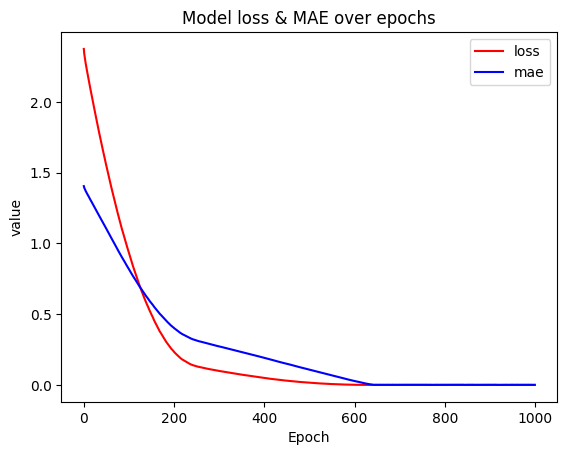

In [15]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend() # 범례 label 추가
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [16]:
# 7. 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 29ms/step


array([[0.31930032],
       [0.33729354]], dtype=float32)

In [17]:
model.save('model/after_learning.h5')

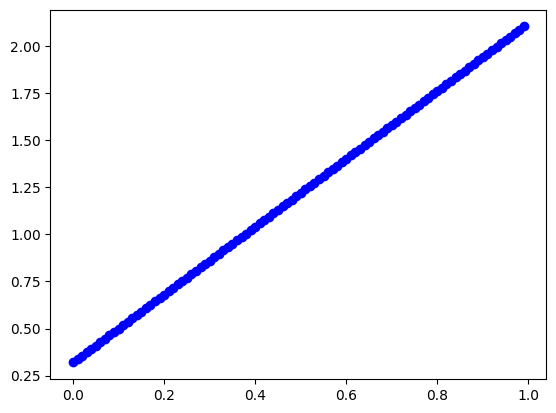

In [18]:
# 실제값
plt.scatter(x=scaled_data_C,
           y=scaled_data_F,
           c='b')
plt.show()

In [19]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat, scaled_data_F):
    print('예측값:{}, 실제값:{}, 오차:{}'.format(h,
                                      y,
                                      h[0]-y))

4/4 [==============================] - 0s 2ms/step
예측값:[0.31930032], 실제값:0.32, 오차:-0.0006996762752533026
예측값:[0.33729354], 실제값:0.33799999999999997, 오차:-0.0007064645290374427
예측값:[0.35528672], 실제값:0.35600000000000004, 오차:-0.0007132825851440816
예측값:[0.37327993], 실제값:0.374, 오차:-0.0007200708389282218
예측값:[0.39127314], 실제값:0.392, 오차:-0.0007268590927124174
예측값:[0.40926635], 실제값:0.41, 오차:-0.0007336473464965576
예측값:[0.42725953], 실제값:0.428, 오차:-0.000740465402603141
예측값:[0.44525275], 실제값:0.446, 오차:-0.0007472536563873367
예측값:[0.46324593], 실제값:0.46399999999999997, 오차:-0.0007540717124938645
예측값:[0.48123914], 실제값:0.48200000000000004, 오차:-0.0007608599662781157
예측값:[0.49923235], 실제값:0.5, 오차:-0.0007676482200622559
예측값:[0.51722556], 실제값:0.518, 오차:-0.0007744364738464515
예측값:[0.5352187], 실제값:0.536, 오차:-0.0007812843322754226
예측값:[0.5532119], 실제값:0.554, 오차:-0.0007880725860596183
예측값:[0.57120514], 실제값:0.5720000000000001, 오차:-0.000794860839843814
예측값:[0.58919835], 실제값:0.59, 오차:-0.0008016490936278986
예측값:[0.60

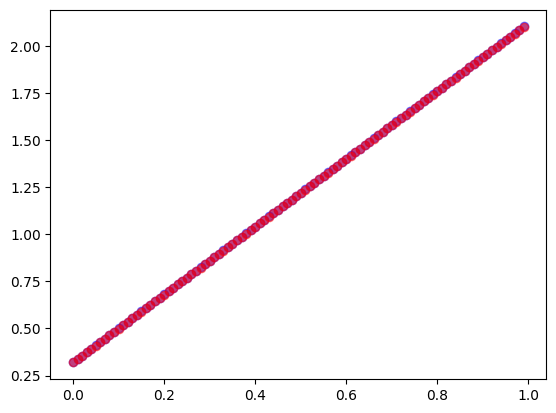

In [20]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # 투명한 점그래프
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)

## 2.2 노이즈가 있는 데이터로 실습

In [21]:
np.random.seed(7)
noise= np.random.normal(0,scale=0.1, size=100) #평균0,표쥰편차 0.1개 100개 데이터
noised_scaled_data_F =scaled_data_F + noise

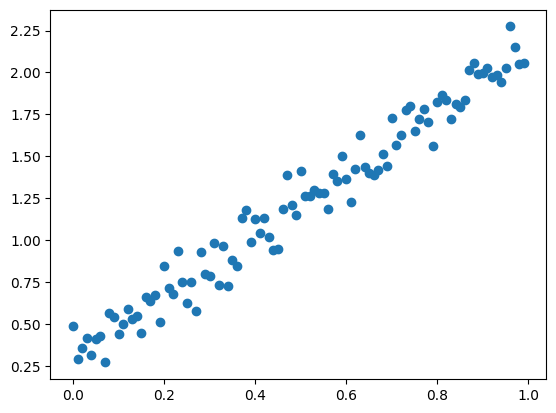

In [22]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [26]:
# 3. 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:

# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.5422 - mae: 1.4444
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.5067 - mae: 1.4331
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.4817 - mae: 1.4251
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.4608 - mae: 1.4182
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.4410 - mae: 1.4119
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.4202 - mae: 1.4051
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.4012 - mae: 1.3989
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.3844 - mae: 1.3934
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3673 - mae: 1.3877
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3479 - mae: 1.3813
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 5ms/step - loss: 0.4240 - mae: 0.5293
Epoch 175/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4186 - mae: 0.5261
Epoch 176/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4130 - mae: 0.5228
Epoch 177/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4072 - mae: 0.5193
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4019 - mae: 0.5163
Epoch 179/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3963 - mae: 0.5130
Epoch 180/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3905 - mae: 0.5097
Epoch 181/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3850 - mae: 0.5064
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3796 - mae: 0.5033
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3741 - mae: 0.5001
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.1033 - mae: 0.2718
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1026 - mae: 0.2709
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1019 - mae: 0.2700
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1014 - mae: 0.2692
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1008 - mae: 0.2684
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1004 - mae: 0.2678
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1001 - mae: 0.2673
Epoch 353/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0996 - mae: 0.2666
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0990 - mae: 0.2658
Epoch 355/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0987 - mae: 0.2652
Epoch 356/1000
4/4 [==============================] - 0s 3ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0317 - mae: 0.1476
Epoch 519/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0314 - mae: 0.1469
Epoch 520/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0311 - mae: 0.1462
Epoch 521/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0308 - mae: 0.1455
Epoch 522/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0306 - mae: 0.1449
Epoch 523/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0302 - mae: 0.1441
Epoch 524/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0300 - mae: 0.1435
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0297 - mae: 0.1429
Epoch 526/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0295 - mae: 0.1424
Epoch 527/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0292 - mae: 0.1416
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0829
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0826
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0824
Epoch 693/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0823
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0822
Epoch 695/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0109 - mae: 0.0821
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0819
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0820
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0817
Epoch 699/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0108 - mae: 0.0819
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 863/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 868/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0806
Epoch 869/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 870/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 871/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 872/1000
4/4 [==============================] - 0s 2ms/step

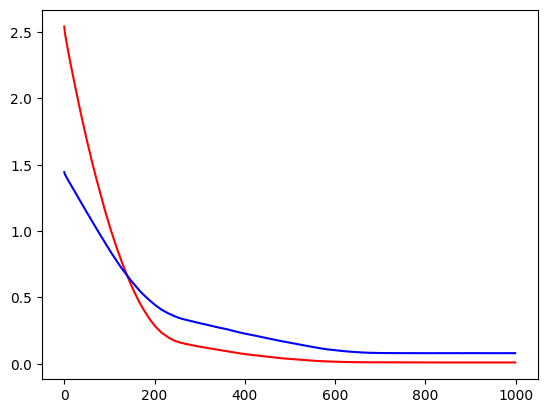

In [28]:
# 6. 학습된 모델 과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [29]:
model.save('model/after_noise_learning.h5')

In [30]:
#예측값
y_hat = model2.predict([scaled_data_C])


4/4 [==============================] - 0s 2ms/step


In [31]:
for h, y in zip(y_hat, noised_scaled_data_F):
    print("실제값:{}, 예측값:{}, 오차:{}".format(y,
                                        h,
                                        h[0]-y))

실제값:0.48905257038003563, 예측값:[0.30520737], 오차:-0.18384519866830468
실제값:0.2914062629459167, 예측값:[0.32353222], 오차:0.032125960755560345
실제값:0.3592820163678585, 예측값:[0.34185708], 오차:-0.01742494067663536
실제값:0.4147516282996508, 예측값:[0.36018193], 오차:-0.05456970061868155
실제값:0.31310769713742614, 예측값:[0.3785068], 오차:0.06539911233561158
실제값:0.4102065572905948, 예측값:[0.39683166], 오차:-0.013374895827810984
실제값:0.42791096141420687, 예측값:[0.4151565], 오차:-0.012754447961676962
실제값:0.2705275693654579, 예측값:[0.4334814], 오차:0.16295382587914048
실제값:0.5657658005663493, 예측값:[0.45180625], 오차:-0.1139595533320048
실제값:0.542049851591955, 예측값:[0.4701311], 오차:-0.07191875236786438
실제값:0.43745710260332404, 예측값:[0.48845595], 오차:0.050998848610512626
실제값:0.5008451738804279, 예측값:[0.5067808], 오차:0.005935629323154834
실제값:0.5865299374196752, 예측값:[0.52510566], 오차:-0.06142428222634633
실제값:0.5278643584808353, 예측값:[0.5434305], 오차:0.015566148702239602
실제값:0.5477250921327455, 예측값:[0.5617554], 오차:0.01403032664472037
실제값:0.4446758587